# Table of Contents
1. Introduction
2. Import
3. Analysis & Preprocessing
4. Model
5. Training
6. Analysis & Conclusion

# 1. Introduction
References:
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/

# 2. Import

In [35]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils, callbacks
from tensorflow.keras.optimizers import Adam
import matplotlib.axes as ax
from keras.layers import Dense, Activation, BatchNormalization

# 3. Analysis & Preprocessing

In [36]:
data = pd.read_csv('../../data_sets/fetal_health.csv')
data.head(5)
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [48]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(data.drop('fetal_health', axis=1), data['fetal_health'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1700, 21)
y_train shape is: (1700,) 

x_val shape is: (319, 21)
y_val shape is: (319,) 

x_test shape is: (107, 21)
y_test shape is: (107,)


# 4. Model

In [58]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax', name='output'))

model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='sgd',
            metrics= ['accuracy']
            )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_13 (Bat  (None, 21)               84        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 64)                1408      
                                                                 
 batch_normalization_14 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_15 (Bat  (None, 32)              

# 5. Training

In [59]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=8, restore_best_weights = True)

In [60]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val),callbacks = [earlystopping])

Epoch 1/50
 1/54 [..............................] - ETA: 17s - loss: 1.3514 - accuracy: 0.1875

2022-04-09 02:49:32.268970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 11ms/step - loss: 0.7417 - accuracy: 0.6047 - val_loss: 0.3644 - val_accuracy: 0.8056
Epoch 2/50
 9/54 [====>.........................] - ETA: 0s - loss: 0.4567 - accuracy: 0.8021

2022-04-09 02:49:32.892821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 7ms/step - loss: 0.4126 - accuracy: 0.8035 - val_loss: 0.4306 - val_accuracy: 0.7837
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 0.3349 - accuracy: 0.8182 - val_loss: 0.4493 - val_accuracy: 0.8088
Epoch 4/50
54/54 [==============================] - 0s 7ms/step - loss: 0.2987 - accuracy: 0.8200 - val_loss: 0.4066 - val_accuracy: 0.8056
Epoch 5/50
54/54 [==============================] - 0s 8ms/step - loss: 0.2784 - accuracy: 0.8241 - val_loss: 0.3563 - val_accuracy: 0.8056
Epoch 6/50
54/54 [==============================] - 0s 7ms/step - loss: 0.2666 - accuracy: 0.8306 - val_loss: 0.3100 - val_accuracy: 0.8213
Epoch 7/50
54/54 [==============================] - 0s 7ms/step - loss: 0.2724 - accuracy: 0.8229 - val_loss: 0.2833 - val_accuracy: 0.8307
Epoch 8/50
54/54 [==============================] - 0s 8ms/step - loss: 0.2520 - accuracy: 0.8318 - val_loss: 0.2568 - val_accuracy: 0.8433
Epoch 9/50
54/54 [=============

# 6. Analysis & Conclusion

In [61]:
metrics_df = pd.DataFrame(hist.history)
metrics_df.sample()

,loss,accuracy,val_loss,val_accuracy
29,0.21655,0.826471,0.195047,0.852665


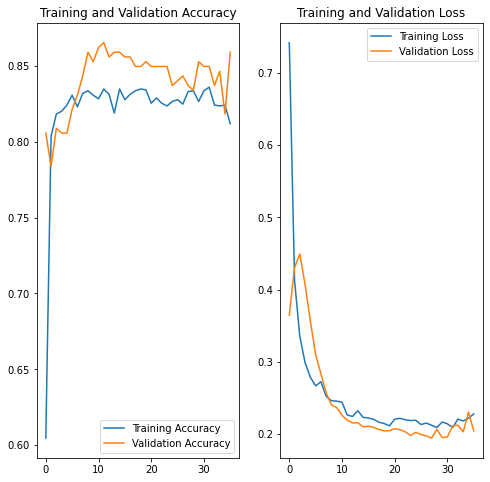

In [62]:
early_stop_epoch = 36

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(early_stop_epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
print(f'Avg Training Accuracy: {round(metrics_df.accuracy.mean() * 100, 1)}')
print(f'Avg Validation Accuracy: {round(metrics_df.val_accuracy.mean() * 100, 1)}')

Avg Training Accuracy: 82.1
Avg Validation Accuracy: 84.1


In [64]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 10ms/step - loss: 0.2247 - accuracy: 0.8318


[0.22466659545898438, 0.8317756652832031]

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['normal', 'suspect', 'pathological'] ))

              precision    recall  f1-score   support

      normal       0.86      0.99      0.92        83
     suspect       0.58      0.41      0.48        17
pathological       0.00      0.00      0.00         7

    accuracy                           0.83       107
   macro avg       0.48      0.47      0.47       107
weighted avg       0.76      0.83      0.79       107



2022-04-09 02:49:58.048985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/rachelrenegado/miniforge3/envs/bmen415_2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachelrenegado/miniforge3/envs/bmen415_2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rachelrenegado/miniforge3/envs/bmen415_2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precisio

In [66]:
print(conf_mat)

TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

print (TP, TN, FP, FN)

[[82  1  0]
 [10  7  0]
 [ 3  4  0]]
7 82 1 10


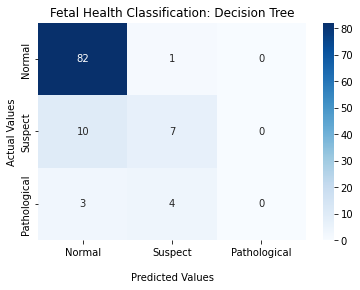

In [67]:
confusion = sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
confusion.set_title("Fetal Health Classification: Decision Tree")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

plt.show()